In [ ]:
# Mounting the drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **ML - Project : To predict customer default or not**

* **In this project we'll be building models to classify the customers - default or not default**
--- ---
*  **Dependent variable - ['default']**
*  **Independent Variable - ['age', 'ed', 'employ', 'income', 'debtinc', creddebt', 'othdebt']**

# **Importing Libraries**

In [ ]:
# For numerical and statistical calculations and functions

import numpy as np
import pandas as pd

# For visulizations and charts

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# For Calculating performance

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_auc_score

# For fltering warnins

import warnings
warnings.filterwarnings('ignore')

# **Reading the csv file(Bankloan)**
---
* **Loading the data**

In [ ]:
# Loading the netflix data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASETS/bankloans.csv')

df.head()

# Creating a copy of the data

df_copy = df.copy()

# Preview of the data

df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,NaN,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31.0,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55.0,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120.0,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28.0,17.3,1.787436,3.056564,1.0


# **Data Understanding**
---

In [ ]:
# Shape of the data file

print(" There are totally \nRows : {} \n columns : {}".format(df.shape[0],df.shape[1]))

 There are totally 
Rows : 850 
 columns : 9


In [ ]:
# information about column names and their respective data types, missing values, and memory consumption 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    846 non-null    float64
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 59.9 KB


# **Observations**

* **We can see some missing values in our datafile.**

* **All the columns are numeric (int and float).**

* **Note - 150 records are missing from our target.**

In [ ]:
# Statistical summary of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,850.0,35.029412,8.041432,20.000000,29.000000,34.000000,41.000000,56.00000
ed,850.0,1.710588,0.927784,1.000000,1.000000,1.000000,2.000000,5.00000
employ,850.0,8.565882,6.777884,0.000000,3.000000,7.000000,13.000000,33.00000
address,850.0,8.371765,6.895016,0.000000,3.000000,7.000000,12.000000,34.00000
income,846.0,46.492908,38.369605,13.000000,24.000000,35.000000,55.000000,446.00000
debtinc,850.0,10.171647,6.719441,0.100000,5.100000,8.700000,13.800000,41.30000
creddebt,850.0,1.576805,2.125840,0.011696,0.382176,0.885091,1.898440,20.56131
othdebt,850.0,3.078789,3.398803,0.045584,1.045942,2.003243,3.903001,35.19750
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000


# **Observations**

* **For this bank, the average age of a customers is 35. The range of age group is 20 - 60**

* **The average income of a customer is 46 and max is 446.**

In [ ]:
# Missing values % from the data and the variables have missing > 0

print(f'Percentahe of total missing values = {((df.isnull().sum().sum() / df.size)*100).round(2)}%')

miss = (df.isnull().sum()/df.shape[0])*100

print("Missing percentage variables > 0\n",miss[miss > 0].round(2))

Percentahe of total missing values = 2.01%
Missing percentage variables > 0
 income      0.47
default    17.65
dtype: float64


# **Observations**

* **The total percentage of missing values is 2.01%**

* **Totally 17% of the data is misiing from target and 0.5% from income**

In [ ]:
# Checking data imbalance - Class[0, 1]

print(round(df['default'].value_counts() / len(df['default']) * 100, 2))

0.0    60.82
1.0    21.53
Name: default, dtype: float64


# **Observation**

* **From this, it's clear that ther target is imbalance**

* **The Default customers is 3X < Nevere default**

# **Data Cleaning**
---

In [ ]:
# Filling nan values to 0 in income catgeory

df['income'] = df['income'].fillna(df['income'].mean())

In [ ]:
# since there are 150 records are missing from the target - creating a new subset for testing

test_df = df[df['default'].isna()]  # --- This data is for forecasting

# Dropping all nan records from the original data

df.dropna(inplace = True)

# finall Shape of the model building data and test data

print("Original Data\nRows : {} \n columns : {}".format(df.shape[0],df.shape[1]))

print("Forecasting Data\nRows : {} \n columns : {}".format(test_df.shape[0],test_df.shape[1]))

Original Data
Rows : 700 
 columns : 9
Forecasting Data
Rows : 150 
 columns : 9


In [ ]:
# converting target variable from float to integer for simplicity

df['default'] = df['default'].astype(int)

# **EDA**



---

# **Bivariate Analysis**

* **Distribution of independent variables with respect to dependent**

    * How the x - independent features are impacting the target - y

In [ ]:
# Plotting box - plot with respeect to target to identify how all the variables are impacting the target

specs = [[{'type': 'box'}, {'type': 'box'}],
         [{'type': 'box'}, {'type': 'box'}],
         [{'type': 'box'}, {'type': 'box'}],
         [{'type': 'box'}, {'type': 'box'}]]

fig = go.Figure()

fig = make_subplots(rows = 4, cols = 2, specs = specs)

row, col = 1, 1

for i in df.columns:
    if i != 'default':
        fig.add_trace(go.Box(x = df['default'], y = df[i], name = i), row = row, col = col)
        fig.update_xaxes(title_text = 'Default', row = row, col = col)
        fig.update_yaxes(title_text = i, row = row, col = col)
        fig.update_layout(width = 1400, height = 1000)
        
        if col == 2:
            row += 1
            col = 1
        else:
            col += 1

fig.update_layout(title="Boxplot - of All Features with respect to Default")
fig.show()

# **Observations**

* **Age - Lower age group people seems to be more defaulted than hifger age group peoples**

* **Employ - the people who are employed very recently are defaulted more  compared to seniors**

* **Income - The people who're getting 25 > & < 50 are more defaulted than the  others.**

* **Creddebt - The people with higher creddebt are more defaulted than the others which is normal.**

* **Debtinc - The People with higher debtinc tends to default more which is normal.**

* **Address - The people who are living at the same location for less duration tends to default more.**

# **Splitting the data**

**To build the model with training data and to test the model performance with testing data**
---

In [ ]:
# For Splitting from Sci-Kit

from sklearn.model_selection import train_test_split

In [ ]:
# splitting the data into train and test using  train_test_split function

x = df.drop('default', axis =1)

y = df['default']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

print("Shape of x_train - {} x_test {}".format(x_train.shape, x_test.shape))

Shape of x_train - (560, 8) x_test (140, 8)


# **Building Models**

---

In [ ]:
# To store the values of accuracy, f1, precision, recall from all the models

acc, prec, recal, f1score, auc_score_all = [], [], [], [], []

# **Logistic Regression**

In [ ]:
# Importing LogisticRegression libraries from scikit

from sklearn.linear_model import LogisticRegression

In [ ]:
def logistic_regression(x_train, x_test, y_train, y_test):
    
    model_l = LogisticRegression()                                              # Building the model
    model_l.fit(x_train, y_train)                                               # Training the model
    pred_l = model_l.predict(x_test)                                            # Prediction
    train_score = model_l.score(x_train, y_train).round(2)                      # Model evaluation - accuracy, recall, precision, f1 score
    test_score = model_l.score(x_test, y_test).round(2)
    accuracy = accuracy_score(y_test, pred_l).round(2)
    recall = recall_score(y_test, pred_l).round(2)
    precision = precision_score(y_test, pred_l).round(2)
    f1 = f1_score(y_test, pred_l).round(2)
    cr = classification_report(y_test, pred_l)                                  # Classification report
    cm = confusion_matrix(y_test, pred_l)                                       # Confusion matrix
    auc_score_l = roc_auc_score(y_test, pred_l)                                 # AUC score
    probs_l = model_l.predict_proba(x_test)     
    fpr_l, tpr_l, thresholds_l = roc_curve(y_test, probs_l[:,1])   
    roc_auc_l = auc(fpr_l, tpr_l)                       
    return train_score, test_score, accuracy, recall, precision, f1, cr, cm, auc_score_l, fpr_l, tpr_l, roc_auc_l, pred_l, model_l

Training_Score  =  0.82
Testing_score   =  0.76
Accuracy_Score  =  0.76
Recall_Score    =  0.44
Precision_Score =  0.71
F1_Score        =  0.55
Classification report
               precision    recall  f1-score   support

           0       0.78      0.92      0.84        95
           1       0.71      0.44      0.55        45

    accuracy                           0.76       140
   macro avg       0.75      0.68      0.69       140
weighted avg       0.76      0.76      0.75       140



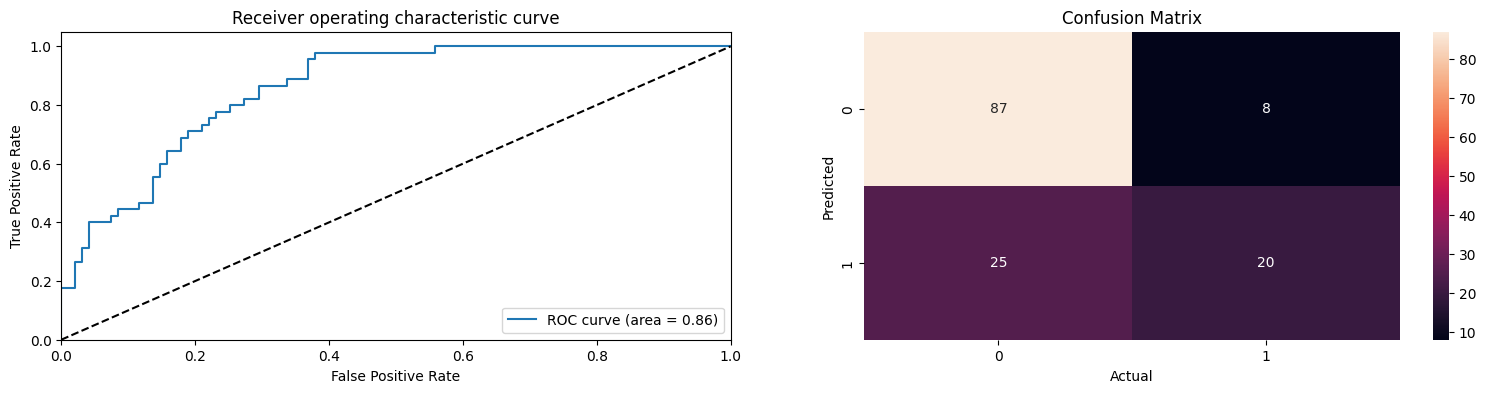

In [ ]:
# Performing Logistic Regression

train_score, test_score, accuracy, recall, precision, f1, cr, cm, auc_score_l, fpr_l, tpr_l, roc_auc_l, pred_l, model_l = logistic_regression(x_train, x_test, y_train, y_test)

print('Training_Score  = ',train_score)
print("Testing_score   = ",test_score)
print("Accuracy_Score  = ",accuracy)
print("Recall_Score    = ",recall)
print("Precision_Score = ",precision)
print("F1_Score        = ",f1)
print("Classification report\n",cr)

# Roc curve and auc score

plt.figure(figsize = (19, 4))
plt.subplot(1,2,1)
plt.plot(fpr_l, tpr_l, label = 'ROC curve (area = %0.2f)' % roc_auc_l)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc = "lower right")

# Confusion matrix

plt.subplot(1,2,2)
sb.heatmap(cm, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

# **Observations**

* **The training score > Testing score - model seems to be normal**

* **The accuracy of the model is 74% and Auc is also 63%**

* **The classification score for class 1 is not good as class 0, it is because of the data imbalance, we see in data understanding**

* **From the confusion matrix it is clear that the model was not good at predicting class 1 because the false prediction of class 1 is 3X more than class 0**

* **Although, the model is good in predicting class 0**




In [ ]:
# adding values to the list

acc.append(accuracy)
prec.append(precision)
recal.append(recall)
f1score.append(f1)
auc_score_all.append(auc_score_l)

---

# **NaiveBayes**

In [ ]:
# Importing naive_bayes from scikit

from sklearn.naive_bayes import GaussianNB

In [ ]:
def Naivebayes(x_train, x_test, y_train, y_test):
    
    model_nb = GaussianNB()                                                     # Building the model
    model_nb.fit(x_train, y_train)                                              # Training the model
    pred_nb = model_nb.predict(x_test)                                          # Prediction
    train_score = model_nb.score(x_train, y_train).round(2)                     # Model evaluation - accuracy, recall, precision, f1 score
    test_score = model_nb.score(x_test, y_test).round(2)
    accuracy = accuracy_score(y_test, pred_nb).round(2)
    recall = recall_score(y_test, pred_nb).round(2)
    precision = precision_score(y_test, pred_nb).round(2)
    f1 = f1_score(y_test, pred_nb).round(2)
    cr = classification_report(y_test, pred_nb)                                 # Classification report
    cm = confusion_matrix(y_test, pred_nb)                                      # Confusion matrix
    auc_score_l= roc_auc_score(y_test, pred_nb)                                 # AUC score
    probs_l = model_nb.predict_proba(x_test)     
    fpr_l, tpr_l, thresholds_l = roc_curve(y_test, probs_l[:,1])   
    roc_auc_l = auc(fpr_l, tpr_l)                       
    return train_score, test_score, accuracy, recall, precision, f1, cr, cm, auc_score_l, fpr_l, tpr_l, roc_auc_l, pred_nb, model_nb

Training_Score  =  0.77
Testing_score   =  0.69
Accuracy_Score  =  0.69
Recall_Score    =  0.24
Precision_Score =  0.55
F1_Score        =  0.34
Classification report
               precision    recall  f1-score   support

           0       0.72      0.91      0.80        95
           1       0.55      0.24      0.34        45

    accuracy                           0.69       140
   macro avg       0.63      0.57      0.57       140
weighted avg       0.66      0.69      0.65       140



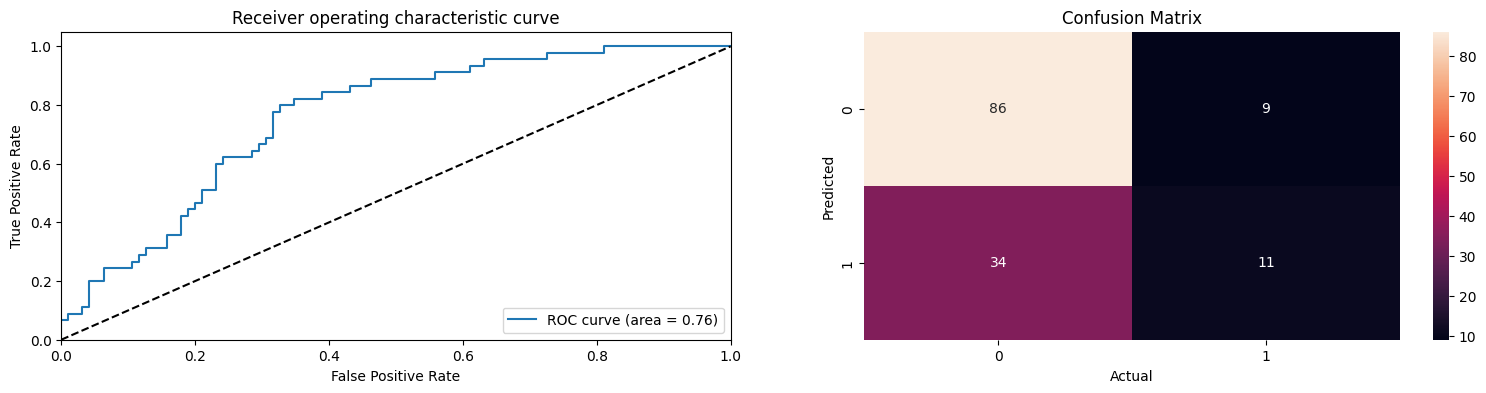

In [ ]:
# Performing Naive Bayes

train_score_nb, test_score_nb, accuracy_nb, recall_nb, precision_nb, f1_nb, cr_nb, cm_nb, auc_score_nb, fpr_nb, tpr_nb, roc_auc_nb, pred_nb, model_nb = Naivebayes(x_train, x_test, y_train, y_test)

print('Training_Score  = ',train_score_nb)
print("Testing_score   = ",test_score_nb)
print("Accuracy_Score  = ",accuracy_nb)
print("Recall_Score    = ",recall_nb)
print("Precision_Score = ",precision_nb)
print("F1_Score        = ",f1_nb)
print("Classification report\n",cr_nb)

# Roc curve and auc score

plt.figure(figsize = (19, 4))
plt.subplot(1,2,1)
plt.plot(fpr_nb, tpr_nb, label = 'ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc = "lower right")

# Confusion matrix

plt.subplot(1,2,2)
sb.heatmap(cm_nb, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

# **Observations**

* **The training score > Testing score - model seems to be normal**

* **The accuracy of the model is 69% and Auc is 57 < Logistic%**

* **The classification score for class 1 is not good as class 0 for naive baiyes also.**

* **From the confusion matrix it is clear that the model was performing low at predicting class 1 because the false prediction of class 1 is 3X more than class 0 which is more than logistic**

* **Although, this model is good in predicting binary classfication, in this case the due to imbalance the model is not performing to its potential**

In [ ]:
# adding values to the list

acc.append(accuracy_nb)
prec.append(precision_nb)
recal.append(recall_nb)
f1score.append(f1_nb)
auc_score_all.append(auc_score_nb)

---

# **DecisionTreeClassifier**

In [ ]:
# Importing DecisionTreeClassifier from scikit

from sklearn.tree import DecisionTreeClassifier

In [ ]:
def DecisionTreeClass(x_train, x_test, y_train, y_test):
    
    model_dt = DecisionTreeClassifier()                                         # Building the model
    model_dt.fit(x_train, y_train)                                              # Training the model
    pred_dt = model_nb.predict(x_test)                                          # Prediction
    train_score = model_dt.score(x_train, y_train).round(2)                     # Model evaluation - accuracy, recall, precision, f1 score
    test_score = model_dt.score(x_test, y_test).round(2)
    accuracy = accuracy_score(y_test, pred_dt).round(2)
    recall = recall_score(y_test, pred_dt).round(2)
    precision = precision_score(y_test, pred_dt).round(2)
    f1 = f1_score(y_test, pred_dt).round(2)
    cr = classification_report(y_test, pred_dt)                                 # Classification report
    cm = confusion_matrix(y_test, pred_dt)                                      # Confusion matrix
    auc_score_l= roc_auc_score(y_test, pred_dt)                                 # AUC score
    probs_l = model_dt.predict_proba(x_test)     
    fpr_l, tpr_l, thresholds_l = roc_curve(y_test, probs_l[:,1])   
    roc_auc_l = auc(fpr_l, tpr_l)                       
    return train_score, test_score, accuracy, recall, precision, f1, cr, cm, auc_score_l, fpr_l, tpr_l, roc_auc_l, pred_dt, model_dt

Training_Score  =  1.0
Testing_score   =  0.66
Accuracy_Score  =  0.69
Recall_Score    =  0.24
Precision_Score =  0.55
F1_Score        =  0.34
Classification report
               precision    recall  f1-score   support

           0       0.72      0.91      0.80        95
           1       0.55      0.24      0.34        45

    accuracy                           0.69       140
   macro avg       0.63      0.57      0.57       140
weighted avg       0.66      0.69      0.65       140



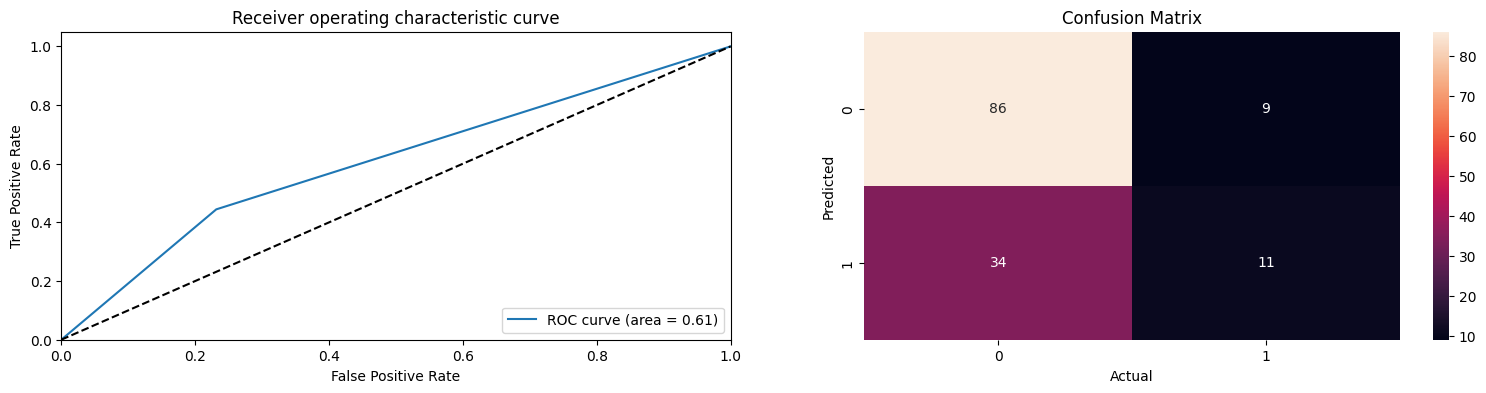

In [ ]:
# Performing DecisionTreeClassifier

train_score_dt, test_score_dt, accuracy_dt, recall_dt, precision_dt, f1_dt, cr_dt, cm_dt, auc_score_dt, fpr_dt, tpr_dt, roc_auc_dt, pred_dt, model_dt = DecisionTreeClass(x_train, x_test, y_train, y_test)

print('Training_Score  = ',train_score_dt)
print("Testing_score   = ",test_score_dt)
print("Accuracy_Score  = ",accuracy_dt)
print("Recall_Score    = ",recall_dt)
print("Precision_Score = ",precision_dt)
print("F1_Score        = ",f1_dt)
print("Classification report\n",cr_dt)

# Roc curve and auc score

plt.figure(figsize = (19, 4))
plt.subplot(1,2,1)
plt.plot(fpr_dt, tpr_dt, label = 'ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
sb.heatmap(cm_dt, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

# **Observations**

* **The training score > Testing score - model seems to be overfitted**

* **The accuracy of the model is 69% < both naivebayes and logistic and Auc is 60 > naive bayes and < Logistic%**

* **The classification score for class 1 is not good as class 0 for Decision tree also.**

* **From the confusion matrix it is clear that the model was performing low at predicting class 1 because the false prediction of class 1 is 3X more than class 0 **

* **But predicting false true is less than logistic and naive bayes**

In [ ]:
# adding values to the list

acc.append(accuracy_dt)
prec.append(precision_dt)
recal.append(recall_dt)
f1score.append(f1_dt)
auc_score_all.append(auc_score_dt)

# **Creating a datframe with all claculated values**

In [ ]:
# Create dataframe
results_df = pd.DataFrame({
    'Model': ['LOgistic_Regression', 'Naive Basyes', 'Decision tree'],
    'F1 Score': f1score,
    'Accuracy': acc,
    'AUC Score': auc_score_all,
    'Precision' : prec,
    'Recall' : recal})

# PLOTTING ALL THE VALUES OBTAINED BY USING THE DIFFERENT MODELS

fig = go.Figure(data = [
    go.Bar(name = 'F1 Score', x = results_df['Model'], y = results_df['F1 Score']),
    go.Bar(name = 'Accuracy', x = results_df['Model'], y = results_df['Accuracy']),
    go.Bar(name = 'AUC Score', x = results_df['Model'], y = results_df['AUC Score']),
    go.Bar(name = 'Precision', x = results_df['Model'], y = results_df['Precision']),
    go.Bar(name = 'Recall', x = results_df['Model'], y = results_df['Recall'])])

fig.update_layout(
    title = 'Model Performance Metrics',
    xaxis_title = 'Model',
    yaxis_title = 'Score',
    barmode = 'group',
    plot_bgcolor = 'rgba(240,240,240,0.7)',
    paper_bgcolor = 'pink')

fig.show()

# **Conclusion**

* **1. This data is totally imbalance**

* **2. Because of imbalance models are not performing very good at classiying class 1 - Defaulted**

* **3. Even though the models can able to classify the class 0**

* **4. From the given data all the calculations and the performance of the model are plotted above**

* **5. From the chart, It's obvious that logistic regression is performing better in all the claculation evaluations**

* **6. Naive bayes is also good model compared to decision tree.**

* **7. Decision tree is not a good model for this data, this model is overfitted and can't be able to clasify the classess properly**

* **8. Finally, from all the calculations values LogisticRegression  is the better model to proceed with forecasting**

# **Forecasting**

* **Here we are forecasting using the test data created earlier**

In [ ]:
# Predicting the target and adding predicted values to the test data

test_df['default'] = model_l.predict(test_df.drop('default', axis =1))

test_df.sample(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
793,23,1,6,2,15.0,12.7,1.375410,0.529590,0
801,35,2,0,6,35.0,12.4,2.382660,1.957340,1
825,29,2,0,7,23.0,8.0,1.242000,0.598000,0
848,35,2,1,11,24.0,7.8,0.417456,1.454544,0
755,47,2,7,24,49.0,0.9,0.253575,0.187425,0
784,38,4,13,2,126.0,13.7,7.612542,9.649458,1
715,46,1,7,6,41.0,23.4,0.585234,9.008766,0
789,25,2,5,3,42.0,15.5,3.365670,3.144330,1
705,25,2,1,3,14.0,9.9,0.232848,1.153152,0
817,38,2,0,18,21.0,4.6,0.612444,0.353556,0


In [ ]:
# Predicted data

test_df['default'].value_counts()

0    129
1     21
Name: default, dtype: int64

**The pattern of predicted data is almost same as the original data, the data is predicted more class 0**